In [37]:
import pyshark
import matplotlib.pyplot as plt
import fitter
import nest_asyncio

In [38]:
nest_asyncio.apply()

In [39]:
pcap = pyshark.FileCapture("../../benign-example-300-1.pcap")

In [40]:
SECONDS_PER_MINUTE = 60
TIME_WINDOW = 2 # seconds
DELTA = 1

pkt = list(pcap)[-1]
print(pkt)
num_time_windows = int(float(pkt['tcp'].time_relative) // TIME_WINDOW) + 1
volume_per_window = [0 for i in range(num_time_windows)]

# print("Due to stopping application, the cutoff index of time window: ", cutoff_index)
print("Original packet trace consisted of: ", len(volume_per_window) , " time windows")

for pkt in pcap:
    tcp = pkt['tcp']
    ip = pkt['ip']
    t = float(tcp.time_relative) // TIME_WINDOW
    index = int(t)
    volume_per_window[index] += int(ip.len)

# cutoff early if necessary (pcap can get too long sometimes)
cutoff_index = num_time_windows - 1


Packet (Length: 54)
Layer PPP
:	Protocol: Internet Protocol version 4 (0x0021)
Layer IP
:	0100 .... = Version: 4
	.... 0101 = Header Length: 20 bytes (5)
	Differentiated Services Field: 0x00 (DSCP: CS0, ECN: Not-ECT)
	0000 00.. = Differentiated Services Codepoint: Default (0)
	.... ..00 = Explicit Congestion Notification: Not ECN-Capable Transport (0)
	Total Length: 52
	Identification: 0x008f (143)
	Flags: 0x00
	0... .... = Reserved bit: Not set
	.0.. .... = Don't fragment: Not set
	..0. .... = More fragments: Not set
	...0 0000 0000 0000 = Fragment Offset: 0
	Time to Live: 55
	Protocol: TCP (6)
	Header Checksum: 0x0000 [validation disabled]
	Header checksum status: Unverified
	Source Address: 192.169.38.1
	Destination Address: 192.170.129.1
Layer TCP
:	Source Port: 49153
	Destination Port: 8081
	Stream index: 31
	Conversation completeness: Complete, WITH_DATA (31)
	TCP Segment Len: 0
	Sequence Number: 509    (relative sequence number)
	Sequence Number (raw): 509
	Next Sequence Number:

In [41]:
print(volume_per_window[:cutoff_index])

[8245, 264, 422, 213, 1598, 530, 866, 209, 1825, 531, 953, 586, 1768, 421, 605, 538, 796, 642, 1022, 588, 864, 317, 805, 600, 426, 106, 477, 653, 1138, 1015, 535, 638, 495, 693, 477, 428, 852, 439, 533, 545, 636, 535, 541, 483, 791, 651, 641, 870, 953, 640, 697, 1008, 551, 1295, 375, 530, 850, 1434, 1012, 545, 867, 691, 428, 699, 690, 1608, 967, 950, 744, 343, 489, 317, 806, 871, 597, 550, 587, 853, 904, 432, 650, 964, 602, 214, 848, 1016, 610, 541, 475, 704, 1076, 591, 796, 432, 643, 107, 1002, 960, 594, 222, 853, 1349, 851, 531, 423, 859, 961, 739, 326, 876, 720, 692, 855, 651, 219, 531, 805, 638, 487, 210, 529, 421, 327, 317, 475, 265, 500, 1664, 649, 530, 822, 856, 371, 969, 588, 1225, 1455, 687, 372, 1348, 770, 335, 748, 843, 978, 1167, 597, 858, 805, 1724, 458, 1505, 706, 850, 584, 1092, 539, 701, 695, 585, 1386, 1026, 800, 654, 477, 960, 318, 743, 435, 792, 1116, 961, 750, 507, 865, 432, 592, 213, 637, 472, 474, 373, 1177, 653, 776, 546, 331, 373, 752, 382, 592, 1315, 752, 745, 

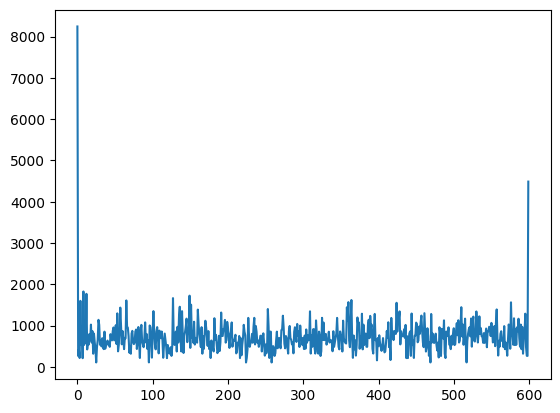

In [42]:
plt.plot(volume_per_window[:cutoff_index])

In [43]:
import numpy as np

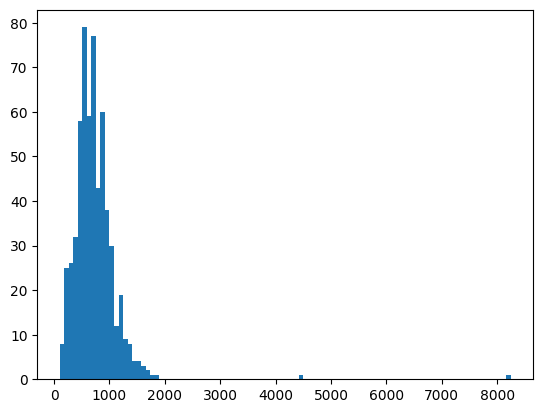

In [44]:
plt.hist(volume_per_window[:cutoff_index], bins=100)
plt.show()

In [45]:
volume = np.array(volume_per_window[:cutoff_index])

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,4.590728e-07,2932.032195,2949.619914,inf,0.030808,6.081205e-01
lognorm,6.177739e-07,3640.930122,3654.120911,inf,0.052201,7.335892e-02
norm,1.967240e-06,9805.810600,9814.604460,inf,0.139233,1.310107e-10
beta,1.157796e-05,2165.296913,2182.884632,inf,0.601946,1.417319e-208
gamma,1.253319e-05,408473.239678,408486.430467,4.317488,0.996024,0.000000e+00


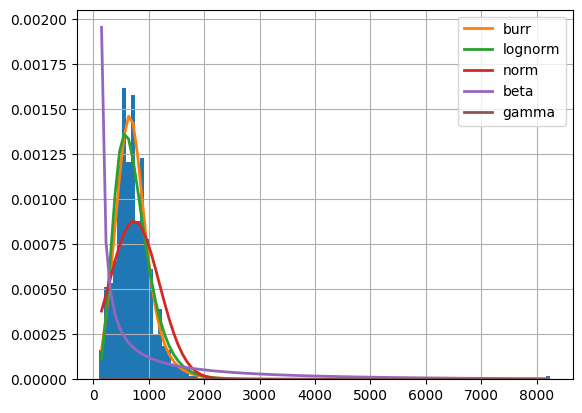

In [46]:
f = fitter.Fitter(volume, distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
"""
sumsquare_error
aic: Akaike information criterion
bic: Bayesian information criterion
"""

f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,6.177739e-07,3640.930122,3654.120911,inf,0.052201,0.073359


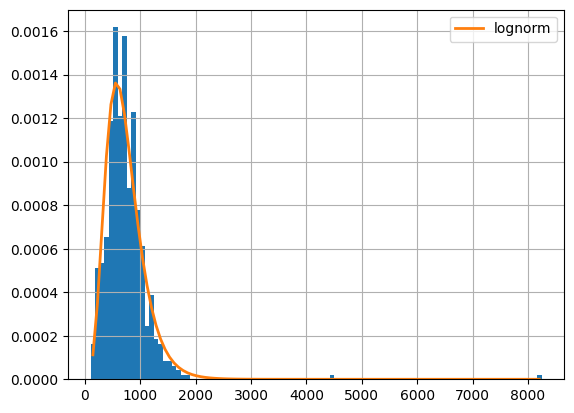

In [47]:
f_lognorm = fitter.Fitter(volume, distributions = ['lognorm'])
f_lognorm.fit()
f_lognorm.summary()